In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../sqlalchemy-challenge/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
from sqlalchemy import inspect

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [13]:
# Find the most recent date in the data set.
start_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(str(start_date))

('2017-08-23',)


In [14]:
session.query(func.count(Measurement.date)).all()

[(19550)]

In [15]:
start_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores

start_date = list(np.ravel(start_date))[0]
start_date = dt.datetime.strptime(start_date, '%Y-%m-%d')
last_year = start_date - dt.timedelta(days=365)

In [17]:
data = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).filter(Measurement.date >= last_year).all()

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

df = pd.DataFrame(data, columns=['date', 'prcp'])
df.set_index('date', inplace=True)
df.head()

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


In [19]:
df.reset_index()
df = pd.DataFrame(data, columns=['date', 'prcp'])
df['prcp'].max()

6.7

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
from matplotlib.dates import DateFormatter 
import matplotlib.ticker as ticker

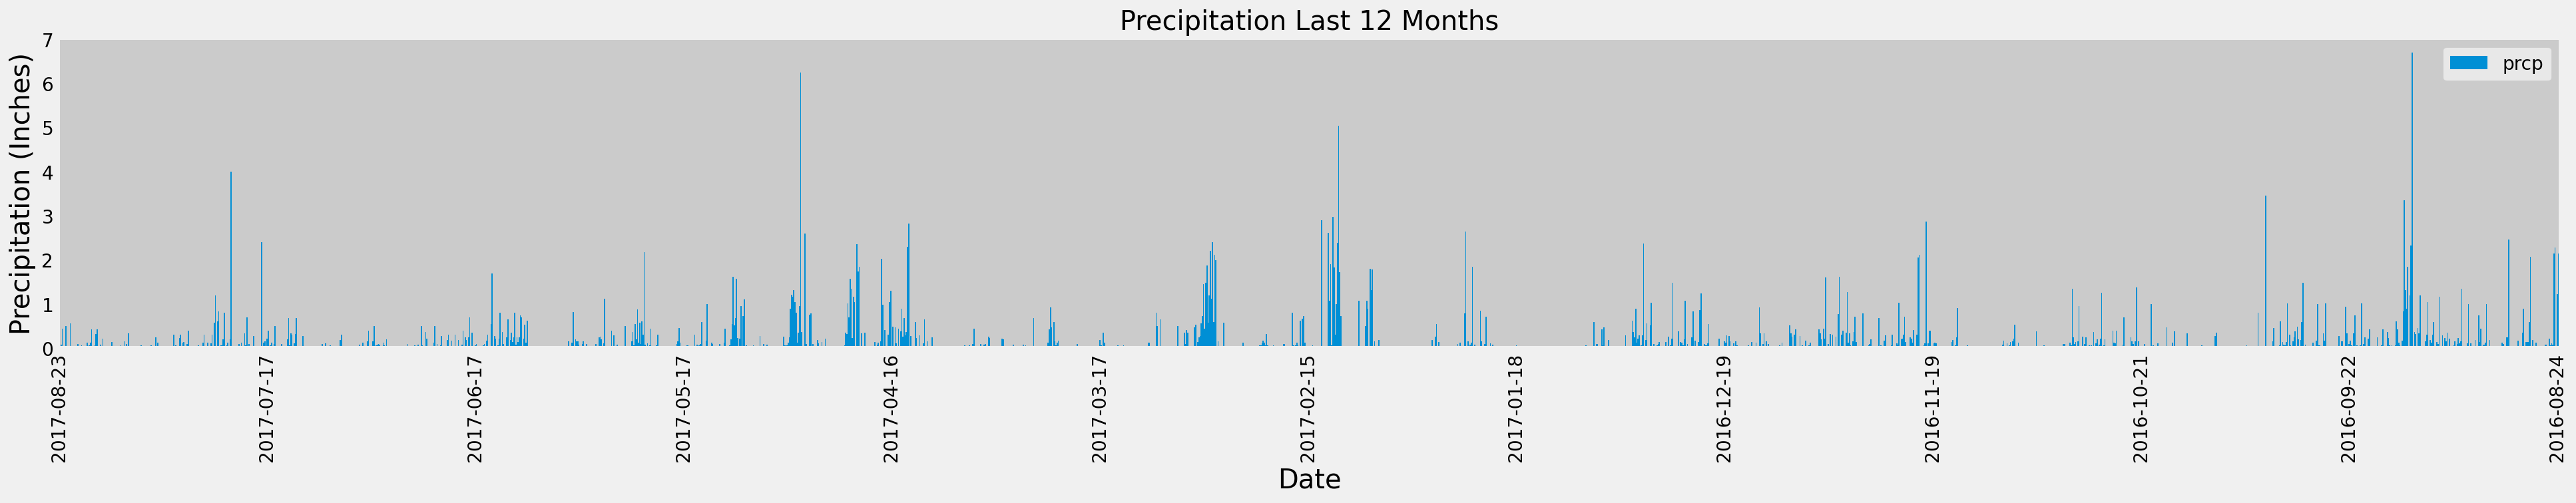

In [23]:
fig = plt.subplots(figsize=(30,4))
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.grid(True)

df.plot.bar(x='date', y='prcp', width=1, ax=ax)

# plt.rcParams["figure.dpi"] = 144

ticklabels = ['']*len(df)
skip = len(df)//12
ticklabels[::skip] = df['date'].iloc[::skip]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
# fig.autofmt_xdate()

ax.set_xlabel("Date", size=20)
ax.set_ylabel("Precipitation (Inches)", size=20)
ax.set_title("Precipitation Last 12 Months", size=20)

ax.figure.show()

In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [25]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9)]

In [26]:
session.query(Station.name).all()

[('WAIKIKI 717.2, HI US'),
 ('KANEOHE 838.1, HI US'),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('PEARL CITY, HI US'),
 ('UPPER WAHIAWA 874.3, HI US'),
 ('WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('WAIHEE 837.5, HI US'),
 ('HONOLULU OBSERVATORY 702.2, HI US'),
 ('MANOA LYON ARBO 785.2, HI US')]

In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

stations_data = session.query(Measurement.station, Station.name).filter(Measurement.station == Station.station).all()

In [28]:
stations_data_df = pd.DataFrame(stations_data, columns=['station', 'name'])
stations_data_df

,station,name
0,USC00519397,"WAIKIKI 717.2, HI US"
1,USC00519397,"WAIKIKI 717.2, HI US"
2,USC00519397,"WAIKIKI 717.2, HI US"
3,USC00519397,"WAIKIKI 717.2, HI US"
4,USC00519397,"WAIKIKI 717.2, HI US"
...,...,...
19545,USC00516128,"MANOA LYON ARBO 785.2, HI US"
19546,USC00516128,"MANOA LYON ARBO 785.2, HI US"
19547,USC00516128,"MANOA LYON ARBO 785.2, HI US"
19548,USC00516128,"MANOA LYON ARBO 785.2, HI US"


In [29]:
stations_data_df.value_counts()

station      name                                  
USC00519281  WAIHEE 837.5, HI US                       2772
USC00519397  WAIKIKI 717.2, HI US                      2724
USC00513117  KANEOHE 838.1, HI US                      2709
USC00519523  WAIMANALO EXPERIMENTAL FARM, HI US        2669
USC00516128  MANOA LYON ARBO 785.2, HI US              2612
USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US    2202
USC00511918  HONOLULU OBSERVATORY 702.2, HI US         1979
USC00517948  PEARL CITY, HI US                         1372
USC00518838  UPPER WAHIAWA 874.3, HI US                 511
dtype: int64

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

qry = session.query(Measurement.station,
                    func.min(Measurement.tobs).label("lowest_temp"), 
                    func.max(Measurement.tobs).label("highest_temp"), 
                    func.avg(Measurement.tobs).label("average_temp"),
                    ).filter(Measurement.station == 'USC00519281').all()
for result in qry:
    print(result)

('USC00519281', 54.0, 85.0, 71.66378066378067)


In [31]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_date = session.query(Measurement.date).filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).first()

In [32]:
active_date = list(active_date)[0]
active_date = dt.datetime.strptime(active_date, '%Y-%m-%d')
last_year = active_date - dt.timedelta(days=365)

In [33]:
waihee_last_yr = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).filter(Measurement.date >= last_year).all()

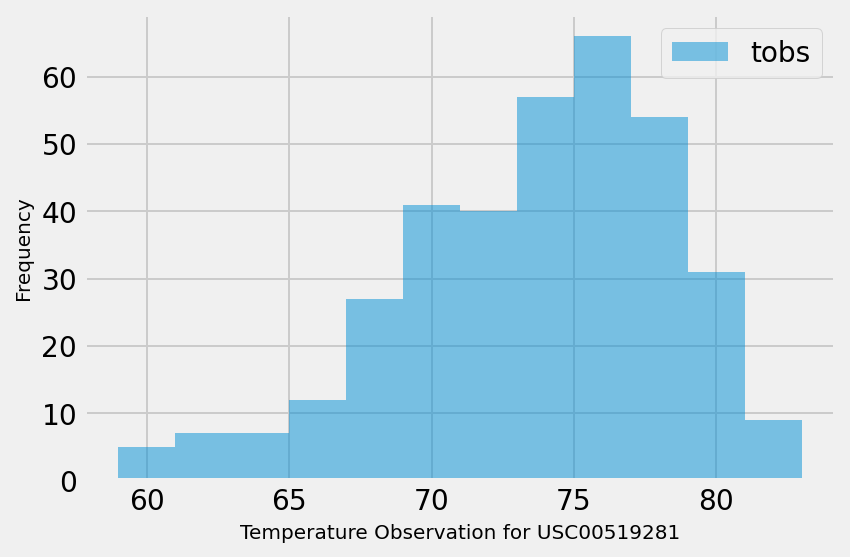

In [34]:
waihee_df = pd.DataFrame(waihee_last_yr)
waihee_df.plot.hist(bins=12, figsize=(6, 4), legend=True, alpha=0.5)
plt.xlabel('Temperature Observation for USC00519281', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend(loc='best')
plt.show()

# Close session

In [35]:
# Close Session
session.close()